**Linear approximations: LSPI**

In this exercise, we are going to use the following Random Walk to study how linear approximations work for RL. In this part, concretely, we will study how to solve the optimal control problem without knowing the model, i.e., in a model-free setting, using the online version of the LSPI (Least-Squares Policy Iteration) algorithm. The Random Walk is the following:

![alt text](rw_2.png "Title")

Let us start with the imports. We use numpy and matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The next thing we do is to seed the random number generator.This is done to ensure that the results are reproducible.At this point, this is not strictly necessary, but it is good practice to do so (and when working with Deep Reinforcement Learning, it is absolutely necessary).

In [2]:
rng = np.random.default_rng(1234)

The next thing to do is to define the MDP using the data given in the image as:

In [3]:
n_states = 4
n_actions = 2
gamma = 0.9  # Discount factor

R = np.array([.9, 0.1, .9, 0.1, 0.1, .9, 0.1, .9]).reshape([n_states * n_actions, 1])

P = np.array([[.1, .9, 0, 0],
              [.9, .1, 0, 0],
              [.1, 0, .9, 0],
              [.9, 0, .1, 0],
              [0, .1, 0, .9],
              [0, .9, 0, .1],
              [0, 0, .1, .9],
              [0, 0, .9, .1]])

pi_opt = np.array([[1, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 1]])  # Optimal policy

Next, we are going to need the feature matrix, that you have computed in a previous exercise for comparison purposes. Copy and paste here the code you used to compute it.

In [4]:
n_features = 2
phi = np.zeros((n_states * n_actions, n_features * n_actions))

# To be filled by the student

with np.printoptions(precision=4, suppress=True):
    print("The feature matrix is:")
    print(phi)

The feature matrix is:
[[0.0967 0.088  0.     0.    ]
 [0.     0.     0.0967 0.088 ]
 [0.0997 0.0967 0.     0.    ]
 [0.     0.     0.0997 0.0967]
 [0.0967 0.0997 0.     0.    ]
 [0.     0.     0.0967 0.0997]
 [0.088  0.0967 0.     0.    ]
 [0.     0.     0.088  0.0967]]


We are going to compare the results with a model-based approach (from the previous exercises) and the linear Bellman equations (exact result). Complete the following code with the codes you have written in the previous exercises.

In [5]:
# Obtain the visiting probability for the optimal policy
P_rp = pi_opt @ P
w, v = np.linalg.eig(P_rp.T)
eig_unit = np.argmin(np.abs(w - 1))  # Find the unit eigenvector
d_v_op = v[:, eig_unit] / np.sum(v[:, eig_unit])
assert np.all(d_v_op >= 0)
d_q_op = np.zeros([n_states * n_actions])
d_q_op[0] = d_v_op[0]
d_q_op[2] = d_v_op[1]
d_q_op[5] = d_v_op[2]
d_q_op[7] = d_v_op[3]
D_q_op = np.diag(d_q_op)  # Diagonal matrix with the visiting probability of the optimal policy

# To be filled by the student

with np.printoptions(precision=4, suppress=True):
    print("The exact Q-function for the optimal policy is:")
    print(q_op_exact.flatten())
    print("The approximate Q-function for the optimal policy is:")
    print(q_op_approx.flatten())

The exact Q-function for the optimal policy is:
[9.  8.2 9.  8.2 8.2 9.  8.2 9. ]
The approximate Q-function for the optimal policy is:
[9.     7.3884 9.     8.4283 8.4283 9.     7.3884 9.    ]


Now, we are going to implement LSPI, in order to find the optimal policy. Complete this code using the LSPI algorithm provided in the slides:

In [6]:
# To be filled by the student: implement LSPI and return q_est_lspi, a vector with the Q-function approximated for the optimal policy

with np.printoptions(precision=4, suppress=True):
    print("The LSPI optimal Q-function approximated for the optimal policy is:")
    print(q_est_lspi.flatten())

The LSPI optimal Q-function approximated for the optimal policy is:
[8.8745 7.1713 8.978  8.2807 8.5179 8.9358 7.5774 9.0179]


Finally, we are going to plot the Q-function for each method, so that you can compare them.

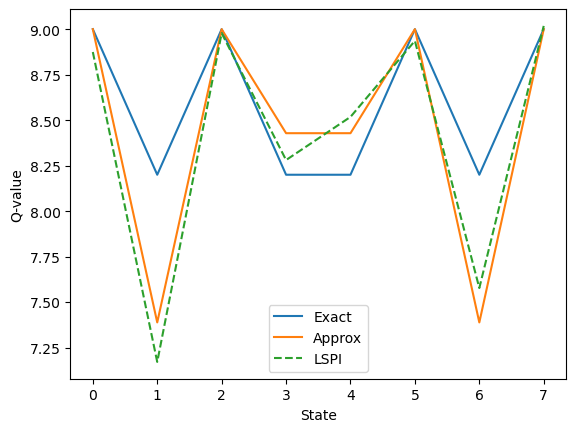

In [7]:
plt.plot(np.arange(n_states * n_actions), q_op_exact.flatten(), label="Exact")
plt.plot(np.arange(n_states * n_actions), q_op_approx.flatten(), label="Approx")
plt.plot(np.arange(n_states * n_actions), q_est_lspi.flatten(), linestyle='dashed', label="LSPI")
plt.xlabel('State')
plt.ylabel('Q-value')
plt.legend(loc='best')
plt.show()